In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-data/weather_data.csv


In [2]:
data=pd.read_csv('/kaggle/input/weather-data/weather_data.csv')

In [3]:
data.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


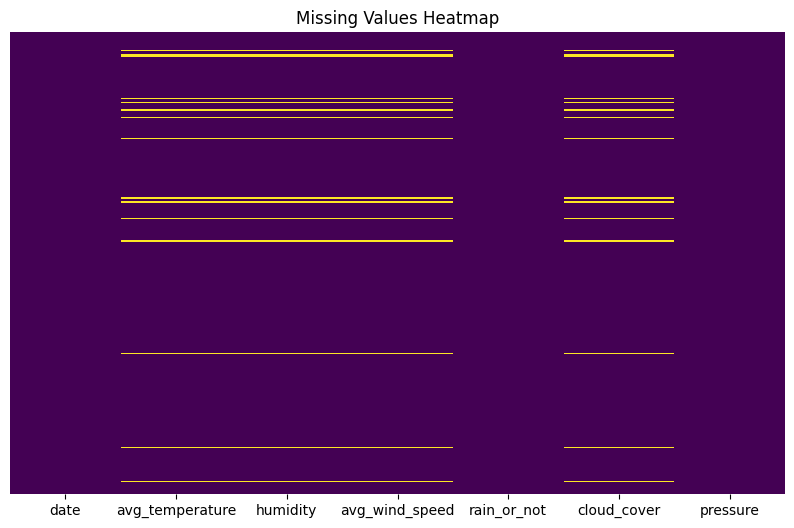

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Median imputation for numerical columns
numerical_columns = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify missing values are handled
print("\nMissing values after imputation:")
print(data.isnull().sum())



Missing values after imputation:
date               0
avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
dtype: int64


<ipython-input-8-f621dc7cf035>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [9]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Add 'season' feature
data['season'] = (data['date'].dt.month % 12) // 3 + 1

# Add 'weekday' feature (0=Monday, 6=Sunday)
data['weekday'] = data['date'].dt.weekday


# Extract year, month, and day

data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the original 'date' column (optional)
data.drop('date', axis=1, inplace=True)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(data.head())


Updated DataFrame:
   avg_temperature   humidity  avg_wind_speed rain_or_not  cloud_cover  \
0        23.745401  46.140905        7.845981        Rain    20.851051   
1        30.030503  59.876587        5.382457        Rain    93.059521   
2        28.365224  51.464618       13.158008        Rain    11.636640   
3        27.550929  53.103799        5.886677        Rain    81.744971   
4        23.639303  57.826186       12.248992        Rain    38.062329   

      pressure  season  weekday  month  day  
0   992.965681       1        6      1    1  
1  1037.273025       1        0      1    2  
2  1034.193357       1        1      1    3  
3   968.610142       1        2      1    4  
4  1030.264331       1        3      1    5  


In [10]:
data['rain_or_not'].value_counts()

rain_or_not
Rain       198
No Rain    113
Name: count, dtype: int64

In [11]:
# Map 'Rain' to 1 and 'No Rain' to 0
data['rain_or_not'] = data['rain_or_not'].map({'Rain': 1, 'No Rain': 0})

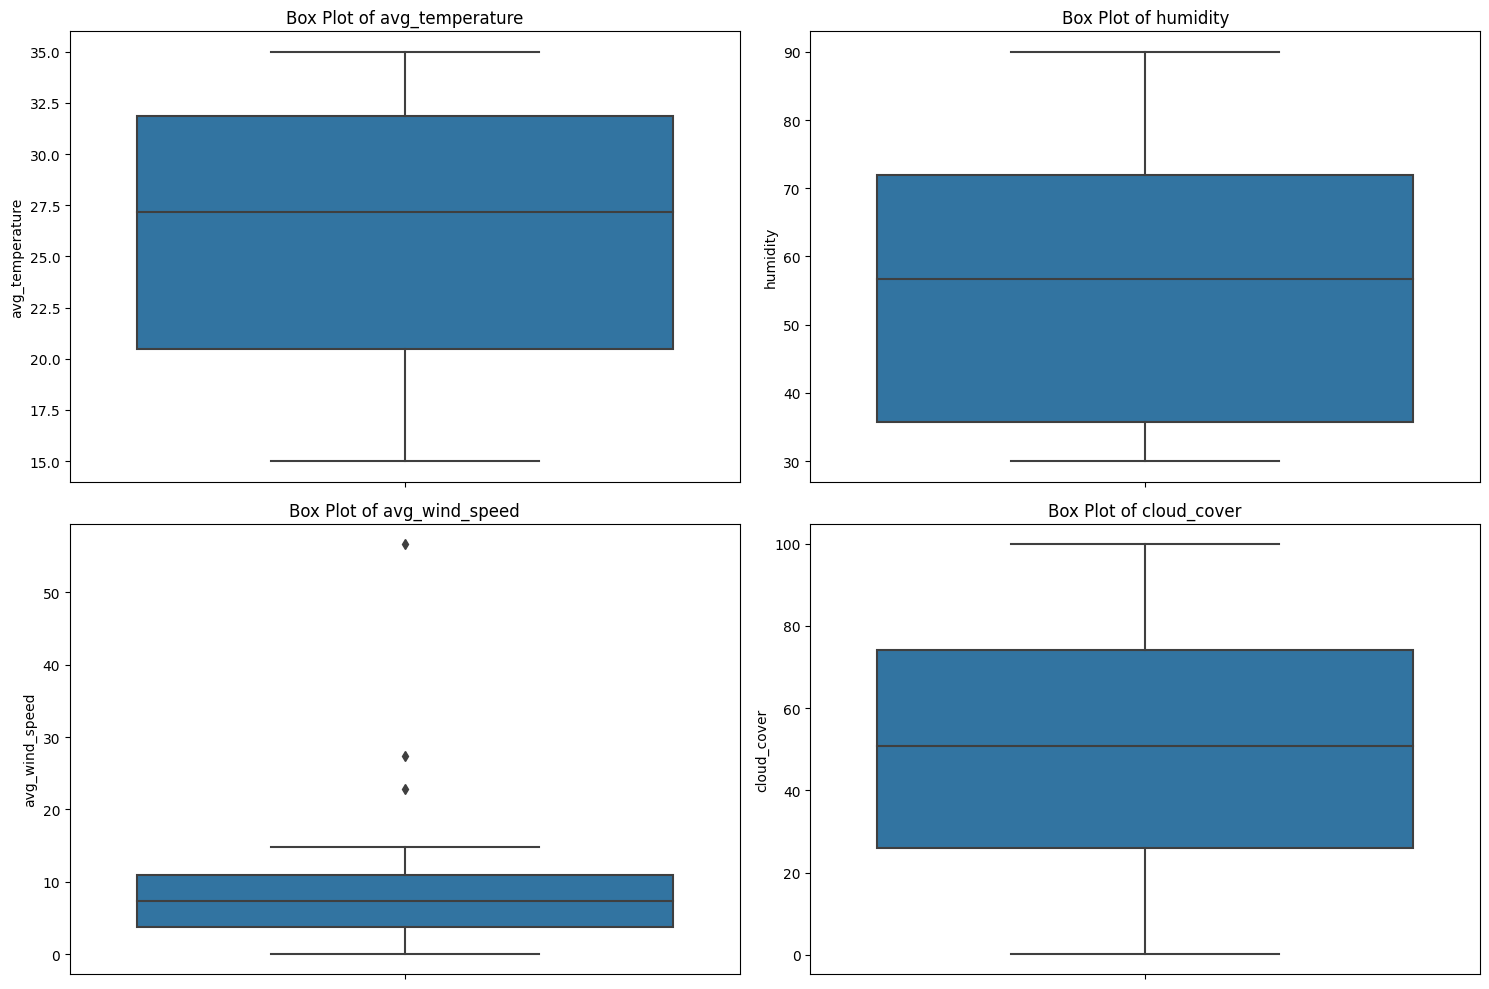

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']

# Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List of numerical columns
numerical_columns = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']

# Calculate IQR and identify outliers
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'IQR for {col}: {IQR:.2f}')
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f'Outliers in {col}: {len(outliers)}')



IQR for avg_temperature: 11.37
Outliers in avg_temperature: 0
IQR for humidity: 36.29
Outliers in humidity: 0
IQR for avg_wind_speed: 7.19
Outliers in avg_wind_speed: 3
IQR for cloud_cover: 48.21
Outliers in cloud_cover: 0


Clipped avg_wind_speed:
count    311.000000
mean       7.410985
std        4.393116
min        0.069480
25%        3.711684
50%        7.326421
75%       10.897166
max       21.675390
Name: avg_wind_speed, dtype: float64


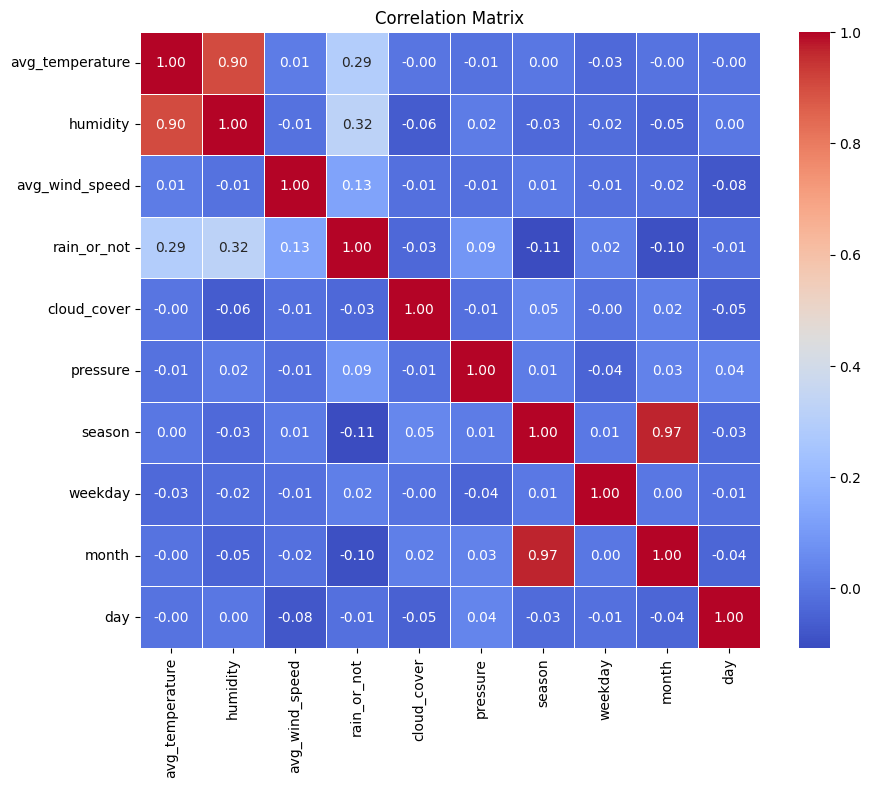

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Clip outliers in avg_wind_speed
Q1 = data['avg_wind_speed'].quantile(0.25)
Q3 = data['avg_wind_speed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['avg_wind_speed'] = data['avg_wind_speed'].clip(lower=lower_bound, upper=upper_bound)

# Verify clipping
print("Clipped avg_wind_speed:")
print(data['avg_wind_speed'].describe())

# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Mutual Information Scores:
           Feature  MI Score
1         humidity  0.063791
7            month  0.059311
4         pressure  0.020196
0  avg_temperature  0.014142
5           season  0.008084
6          weekday  0.004945
8              day  0.003425
2   avg_wind_speed  0.000000
3      cloud_cover  0.000000


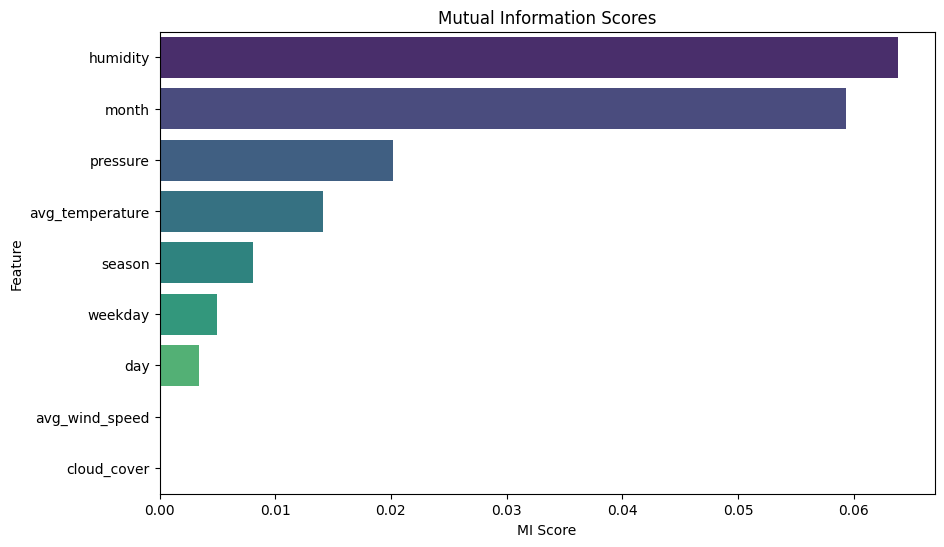

In [15]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt


# Separate features and target
X = data.drop('rain_or_not', axis=1)  # Features
y = data['rain_or_not']  # Target

# Calculate MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame to display MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print("Mutual Information Scores:")
print(mi_df)

# Plot MI scores
plt.figure(figsize=(10, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = data.drop('rain_or_not', axis=1)  # Features
y = data['rain_or_not']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=210,random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        22
           1       0.76      0.76      0.76        41

    accuracy                           0.68        63
   macro avg       0.65      0.65      0.65        63
weighted avg       0.68      0.68      0.68        63


Confusion Matrix:
[[12 10]
 [10 31]]


In [17]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f'LightGBM Accuracy: {accuracy_lgbm:.2f}')

[LightGBM] [Info] Number of positive: 157, number of negative: 91
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 248, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633065 -> initscore=0.545386
[LightGBM] [Info] Start training from score 0.545386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [18]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

           Feature  Importance
1         humidity    0.168699
0  avg_temperature    0.146278
4         pressure    0.141687
2   avg_wind_speed    0.137787
3      cloud_cover    0.131219
8              day    0.104401
7            month    0.069535
6          weekday    0.066305
5           season    0.034089
